#  Viridisify

How to remap a plotwhich has a non perceptually uniform colormap with encoding artifacts.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib.colors as colors

In [3]:
cd ~/Desktop/vir/

/Users/bussonniermatthias/Desktop/vir


In [4]:
!rm *.png *.gif out*

rm: *.gif: No such file or directory


I used the following to convert from mp4 to image sequence (8 fps determined manually). 
Sequence of images to video, and video to gif (quality is better than to gif dirrectly):

```
$ ffmpeg -i INPUT.mp4 -r 8 -f image2 img%02d.png
$ ffmpeg -framerate 8 -i vir-img%02d.png -c:v libx264 -r 8 -pix_fmt yuv420p out.mp4
$ ffmpeg -i out.mp4  output.gif
```

In [5]:
%%bash
ffmpeg -i input.mp4 -r 8 -f image2 img%02d.png

ffmpeg version 3.1.1 Copyright (c) 2000-2016 the FFmpeg developers
  built with Apple LLVM version 7.0.2 (clang-700.1.81)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.1.1 --enable-shared --enable-pthreads --enable-gpl --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-opencl --enable-libx264 --enable-libmp3lame --enable-libxvid --disable-lzma --enable-vda
  libavutil      55. 28.100 / 55. 28.100
  libavcodec     57. 48.101 / 57. 48.101
  libavformat    57. 41.100 / 57. 41.100
  libavdevice    57.  0.101 / 57.  0.101
  libavfilter     6. 47.100 /  6. 47.100
  libavresample   3.  0.  0 /  3.  0.  0
  libswscale      4.  1.100 /  4.  1.100
  libswresample   2.  1.100 /  2.  1.100
  libpostproc    54.  0.100 / 54.  0.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'input.mp4':
  Metadata:
    major_brand     : mp42
    minor_version   : 0
    compatible_brands: mp42mp41isom
    creation_time   : 2016-10-06 19:11:28
  Durat

In [6]:
import matplotlib.image as mpimg
img = mpimg.imread('img01.png')[:,:,:3]

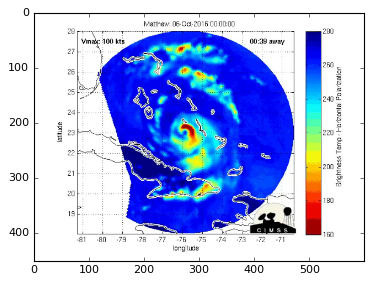

In [7]:
plt.imshow(img)

In [8]:
from scipy.spatial import cKDTree

In [9]:
def convert(sub=256,d=0.2, cin='jet', cout='viridis', img=img, show=True):
    viridis = plt.get_cmap(cout)
    jet = plt.get_cmap(cin)
    jet256 = colors.makeMappingArray(sub, jet)[:, :3]
    K = cKDTree(jet256)
    oshape = img.shape
    img_data = img.reshape((-1,3))
    res = K.query(img_data, distance_upper_bound=d)
    indices = res[1]
    l = len(jet256)
    indices = indices.reshape(oshape[:2])
    remapped = indices

    indices.max()

    mask = (indices == l)

    remapped = remapped / (l-1)
    mask = np.stack( [mask]*3, axis=-1)

    blend = np.where(mask, img, viridis(remapped)[:,:,:3])
    if show:
        fig, ax = plt.subplots()
        fig.set_figheight(10)
        fig.set_figwidth(10)
        ax.imshow(blend)
    return blend

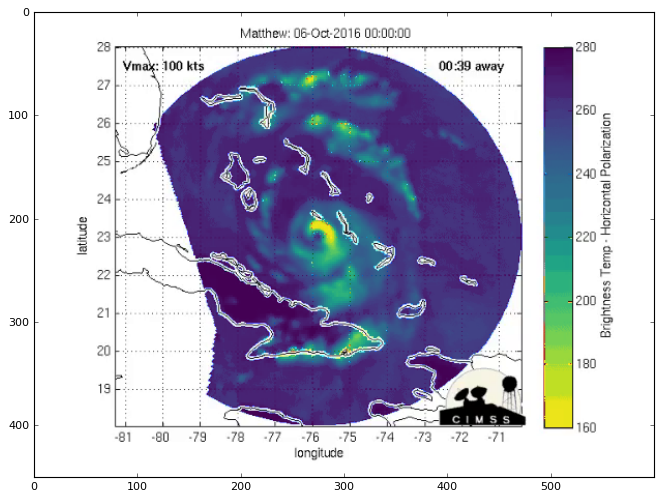

In [10]:
tpl = 'img%02d.png'
tplv = 'vir-img%02d.png'
for i in range(1,18):
    img = mpimg.imread(tpl%i)[:,:,:3]
    vimg = convert(show=(i==1), img=img)
    mpimg.imsave(tplv %i, vimg)

In [15]:
%%bash
ffmpeg -framerate 8 -i vir-img%02d.png -c:v libx264 -r 8 -pix_fmt yuv420p out.mp4 -y

ffmpeg version 3.1.1 Copyright (c) 2000-2016 the FFmpeg developers
  built with Apple LLVM version 7.0.2 (clang-700.1.81)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.1.1 --enable-shared --enable-pthreads --enable-gpl --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-opencl --enable-libx264 --enable-libmp3lame --enable-libxvid --disable-lzma --enable-vda
  libavutil      55. 28.100 / 55. 28.100
  libavcodec     57. 48.101 / 57. 48.101
  libavformat    57. 41.100 / 57. 41.100
  libavdevice    57.  0.101 / 57.  0.101
  libavfilter     6. 47.100 /  6. 47.100
  libavresample   3.  0.  0 /  3.  0.  0
  libswscale      4.  1.100 /  4.  1.100
  libswresample   2.  1.100 /  2.  1.100
  libpostproc    54.  0.100 / 54.  0.100
Input #0, image2, from 'vir-img%02d.png':
  Duration: 00:00:02.13, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgba(pc), 600x450 [SAR 3937:3937 DAR 4:3], 8 fps, 8 tbr, 8 tbn, 8 tbc
[libx

In [16]:
%%bash
ffmpeg -i out.mp4  output.gif -y

ffmpeg version 3.1.1 Copyright (c) 2000-2016 the FFmpeg developers
  built with Apple LLVM version 7.0.2 (clang-700.1.81)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.1.1 --enable-shared --enable-pthreads --enable-gpl --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-opencl --enable-libx264 --enable-libmp3lame --enable-libxvid --disable-lzma --enable-vda
  libavutil      55. 28.100 / 55. 28.100
  libavcodec     57. 48.101 / 57. 48.101
  libavformat    57. 41.100 / 57. 41.100
  libavdevice    57.  0.101 / 57.  0.101
  libavfilter     6. 47.100 /  6. 47.100
  libavresample   3.  0.  0 /  3.  0.  0
  libswscale      4.  1.100 /  4.  1.100
  libswresample   2.  1.100 /  2.  1.100
  libpostproc    54.  0.100 / 54.  0.100
Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'out.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf57.41.100
  Duratio

In [ ]:
img = mpimg.imread('~/Desktop/example.PNG')[:,:,:3]

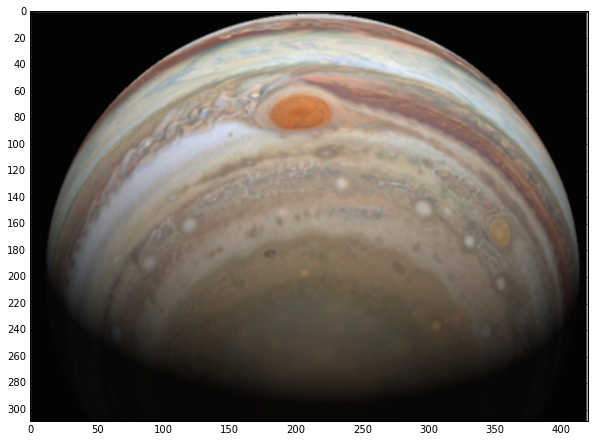

In [13]:
convert(img=img)

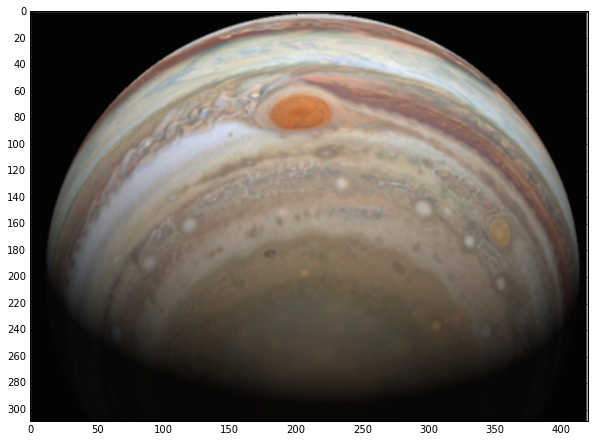

In [14]:
convert(cout='copper',img=img)

In [60]:
img = mpimg.imread('/Users/bussonniermatthias/Desktop/e2.png')[:,:,:3]

In [61]:
x = img.reshape((-1,3)).T[:,:]

In [62]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

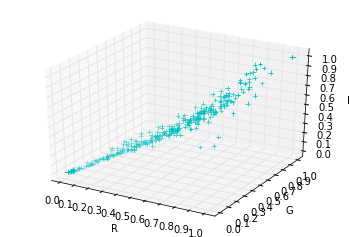

In [63]:

def rep(im):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    pp = im.reshape((-1,3)).T[:,::300]
    ax.scatter(pp[0], pp[1], pp[2], c='c', marker='+')

    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    
rep(img)

In [64]:
%matplotlib inline

In [65]:
import sklearn

In [66]:
import skimage.color as c

In [67]:
l = c.rgb2gray(img).reshape((1,-1))[0]

In [68]:
l

array([ 1.        ,  1.        ,  1.        , ...,  0.01176471,
        0.49019608,  1.        ])

In [69]:
from sklearn.decomposition import PCA

In [70]:
x = x[:,:].T

In [71]:

from sklearn import decomposition
from sklearn import datasets
iris = datasets.load_iris()

In [72]:
np.shape(x)

(130089, 3)

In [73]:
np.shape(iris.data)

(150, 4)

In [74]:
np.shape(l)

(130089,)

In [75]:
np.shape(iris.target)

(150,)

In [112]:
%matplotlib inline

In [127]:
print(__doc__)


# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

X = iris.data
y = iris.target
X = x[::300]
y = l[::300]

#fig = plt.figure(1, figsize=(4, 3))
#plt.clf()
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

#plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X, y=l)
X = pca.transform(X,)

# for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
#     ax.text3D(X[y == label, 0].mean(),
#               X[y == label, 1].mean() + 1.5,
#               X[y == label, 2].mean(), name,
#               horizontalalignment='center',
#               bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(np.float)
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral)

x_surf = [X[:, 0].min(), X[:, 0].max(),
          X[:, 0].min(), X[:, 0].max()]
y_surf = [X[:, 0].max(), X[:, 0].max(),
          X[:, 0].min(), X[:, 0].min()]
x_surf = np.array(x_surf)
y_surf = np.array(y_surf)
v0 = pca.transform(pca.components_[[0]])
v0 /= v0[-1]
#v1 = pca.transform(pca.components_[[1]])
#v1 /= v1[-1]

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

Automatically created module for IPython interactive environment


In [128]:
xp = pca.transform(x)
#xp[:,1] = 0
#xp[:,2] = 0
xpp = pca.inverse_transform(xp)
proj = xpp.reshape(img.shape)

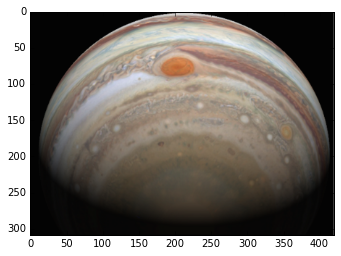

In [129]:
plt.imshow(img)

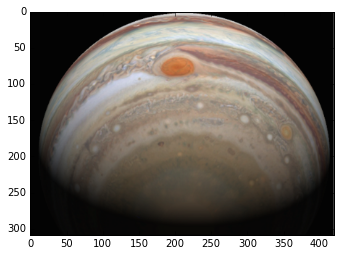

In [130]:
plt.imshow(proj)

In [131]:
np.shape(proj),np.shape(img)

((309, 421, 3), (309, 421, 3))

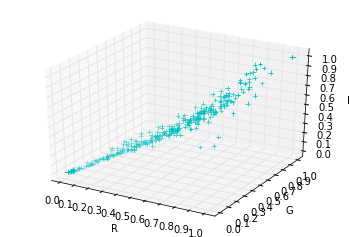

In [132]:
rep(proj)

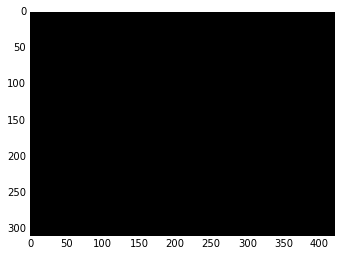

In [133]:
plt.imshow(proj-img)

In [75]:
b= datasets.load_boston()

In [62]:
pca.inverse_transform(0)

array([[ 0.35727724,  0.32753193,  0.2958706 ]])

In [64]:
pca.inverse_transform(np.arange(0,1,0.1))

ValueError: shapes (10,) and (1,3) not aligned: 10 (dim 0) != 1 (dim 0)

In [ ]:
pca.inverse_transform()